# Libraries

Directory

In [5]:
%cd /content/drive/MyDrive/Data Mining for Business in Python/2. Cox Proportional Hazard Regression

/content/drive/.shortcut-targets-by-id/1JmhTPzpvWcRKqJQJjkLntz1sQL9H2a8d/Data Mining for Business in Python/2. Cox Proportional Hazard Regression


In [1]:
!pip install lifelines

     |████████████████████████████████| 348 kB 3.9 MB/s 
     |████████████████████████████████| 55 kB 3.6 MB/s 
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4048 sha256=ffe4dd53d5a0ef245b87aefec75eff456fab8568bc25ac440bd12135fa5c3003
  Stored in directory: /root/.cache/pip/wheels/9f/01/ee/1331593abb5725ff7d8c1333aee93a50a1c29d6ddda9665c9f
Successfully built autograd-gamma


In [2]:
import pandas as pd

In [11]:
#import dataset
dataset = pd.read_csv("lung.csv")
dataset = dataset.dropna()
dataset.head(10)  

,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
1,3.0,455,2,68,1,0.0,90.0,90.0,1225.0,15.0
3,5.0,210,2,57,1,1.0,90.0,60.0,1150.0,11.0
5,12.0,1022,1,74,1,1.0,50.0,80.0,513.0,0.0
6,7.0,310,2,68,2,2.0,70.0,60.0,384.0,10.0
7,11.0,361,2,71,2,2.0,60.0,80.0,538.0,1.0
8,1.0,218,2,53,1,1.0,70.0,80.0,825.0,16.0
9,7.0,166,2,61,1,2.0,70.0,70.0,271.0,34.0
10,6.0,170,2,57,1,1.0,80.0,80.0,1025.0,27.0
14,12.0,567,2,57,1,1.0,80.0,70.0,2600.0,60.0
16,22.0,613,2,70,1,1.0,90.0,100.0,1150.0,-5.0


In [12]:
#transforming dependent variable
dataset.loc[dataset.status == 1, "status"] = 0
dataset.loc[dataset.status == 2, "status"] = 1
dataset.head(10)

,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
1,3.0,455,1,68,1,0.0,90.0,90.0,1225.0,15.0
3,5.0,210,1,57,1,1.0,90.0,60.0,1150.0,11.0
5,12.0,1022,0,74,1,1.0,50.0,80.0,513.0,0.0
6,7.0,310,1,68,2,2.0,70.0,60.0,384.0,10.0
7,11.0,361,1,71,2,2.0,60.0,80.0,538.0,1.0
8,1.0,218,1,53,1,1.0,70.0,80.0,825.0,16.0
9,7.0,166,1,61,1,2.0,70.0,70.0,271.0,34.0
10,6.0,170,1,57,1,1.0,80.0,80.0,1025.0,27.0
14,12.0,567,1,57,1,1.0,80.0,70.0,2600.0,60.0
16,22.0,613,1,70,1,1.0,90.0,100.0,1150.0,-5.0


In [13]:
#remove instances variables
dataset = dataset.drop(columns = "inst")
dataset.head()

,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
1,455,1,68,1,0.0,90.0,90.0,1225.0,15.0
3,210,1,57,1,1.0,90.0,60.0,1150.0,11.0
5,1022,0,74,1,1.0,50.0,80.0,513.0,0.0
6,310,1,68,2,2.0,70.0,60.0,384.0,10.0
7,361,1,71,2,2.0,60.0,80.0,538.0,1.0


# Cox Proportional Hazard

In [14]:
#CPH model
from lifelines import CoxPHFitter
model = CoxPHFitter()
model.fit(dataset,
          "time",
          event_col = "status")
model.print_summary()

<lifelines.CoxPHFitter: fitted with 167 total observations, 47 right-censored observations>
             duration col = 'time'
                event col = 'status'
      baseline estimation = breslow
   number of observations = 167
number of events observed = 120
   partial log-likelihood = -494.03
         time fit was run = 2021-07-27 13:05:36 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
age         0.01       1.01       0.01            -0.01             0.03                 0.99                 1.03
sex        -0.55       0.57       0.20            -0.95            -0.16                 0.39                 0.85
ph.ecog     0.74       2.09       0.22             0.30             1.18                 1.35                 3.26
ph.karno    0.02       1.02       0.01             0.00             0.04                 1.00                 1.05
pat.karno  -0.01       0.99       0.01            -0.03             0.00                 0.97                 1.00
meal.cal    0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
wt.loss    -0.01       0.99       0.01            -0.03             0.00                 0.97                 1.00

              z      p   -log2(p)
covariate                        
age        0.93   0.35       1.51
sex       -2.75   0.01       7.37
ph.ecog    3.29 <0.005       9.95
ph.karno   2.00   0.05       4.45
pat.karno -1.49   0.14       2.87
meal.cal   0.11   0.91       0.13
wt.loss   -1.83   0.07       3.89
---
Concordance = 0.65
Partial AIC = 1002.07
log-likelihood ratio test = 28.16 on 7 df
-log2(p) of ll-ratio test = 12.25

# Visualization

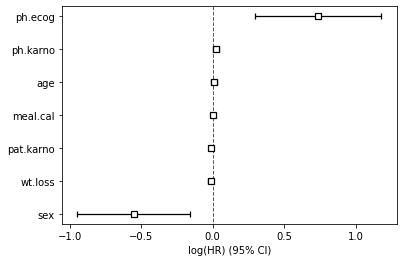

In [15]:
#visualizing model
model.plot()